<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   EmployeeID  20 non-null     int64 
 1   Age         20 non-null     int64 
 2   Department  20 non-null     object
 3   Experience  20 non-null     int64 
 4   Salary      20 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 932.0+ bytes
📌 Basic Information:
 None

📌 First Few Rows of the Dataset:
    EmployeeID  Age Department  Experience  Salary
0           1   23    Finance           8   93563
1           2   28    Finance           2   41742
2           3   37         HR           8   56905
3           4   23         HR          23  138397
4           5   55         IT          29   96879

📌 Summary Statistics:
        EmployeeID        Age  Experience         Salary
count    20.00000  20.000000   20.000000      20.000000
mean     10.50000  42.450000   16.750000  102503.150000
std      

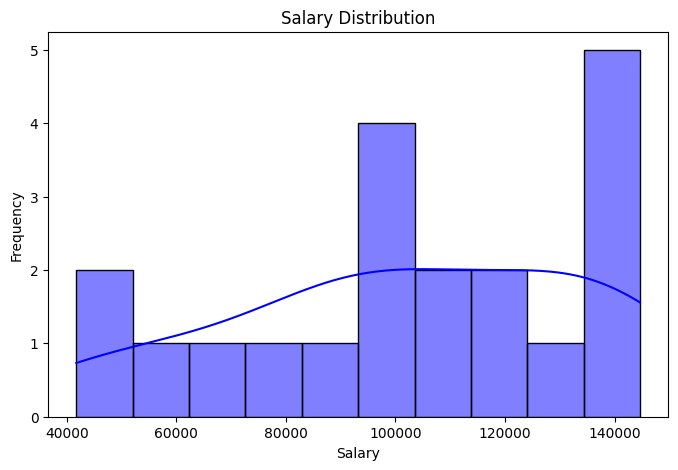

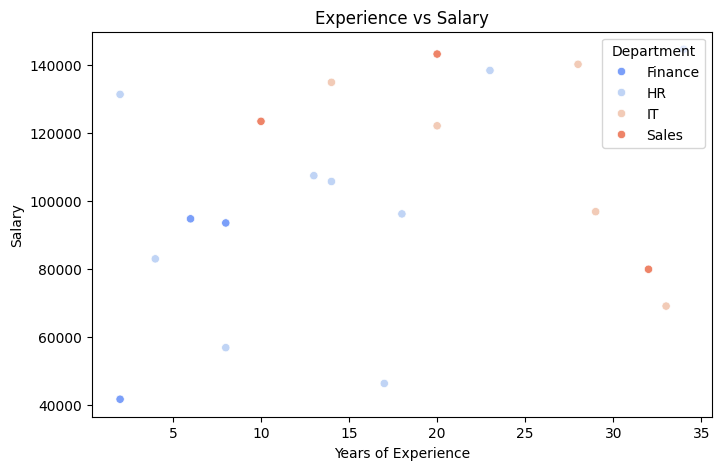

<ipython-input-2-ad9274268370>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Department", y="Salary", data=df, palette="Set2")


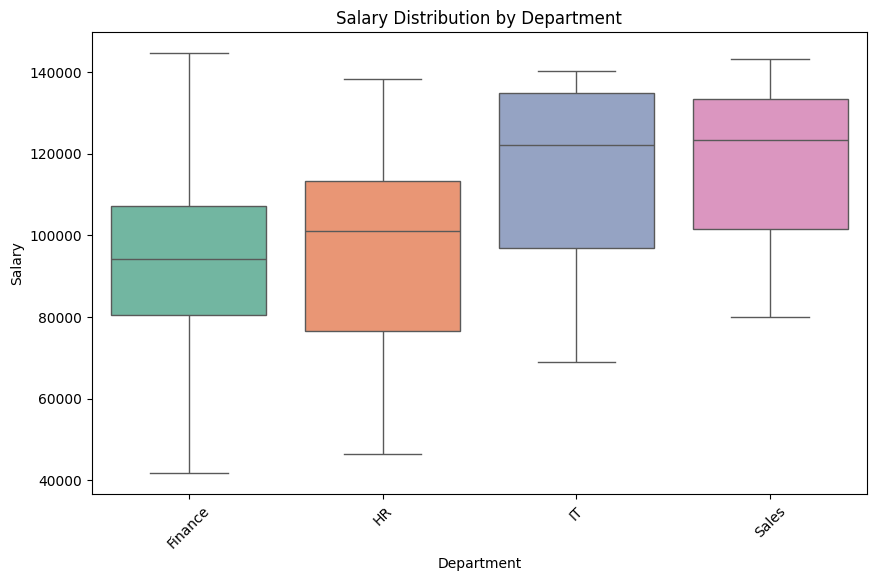

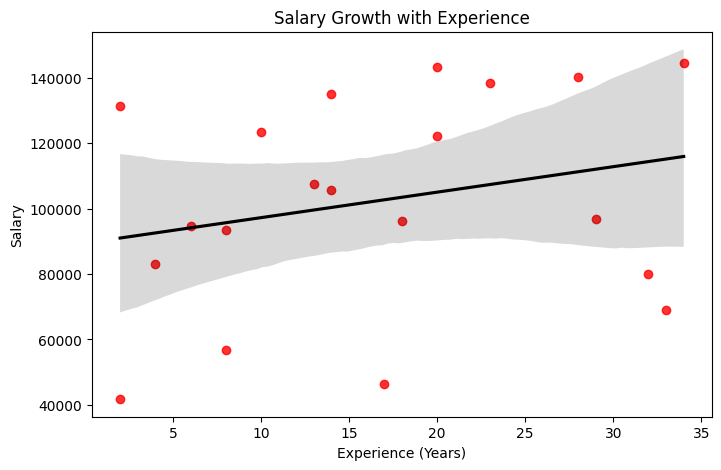

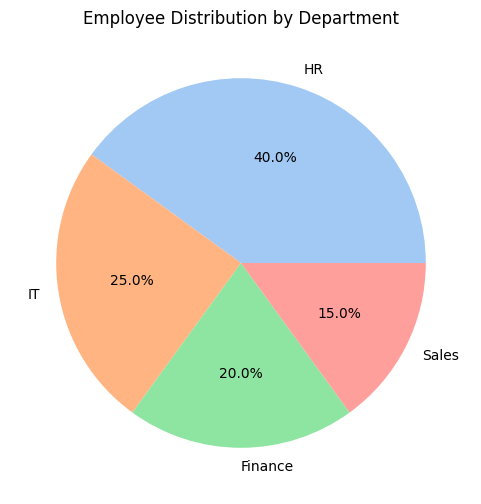

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the employee data CSV file
file_path = "employee_data.csv"  # Update if needed
df = pd.read_csv(file_path)

# Display basic dataset information
print("📌 Basic Information:\n", df.info())

# Display first few rows
print("\n📌 First Few Rows of the Dataset:\n", df.head())

# -------------------- SUMMARY STATISTICS --------------------

print("\n📌 Summary Statistics:\n", df.describe())

# -------------------- DEPARTMENT-WISE ANALYSIS --------------------

# Average salary and experience by department
dept_analysis = df.groupby("Department")[["Salary", "Experience"]].mean()
print("\n📌 Department-wise Average Salary and Experience:\n", dept_analysis)

# Count of employees in each department
dept_count = df["Department"].value_counts()
print("\n📌 Employee Count per Department:\n", dept_count)

# -------------------- CORRELATION ANALYSIS --------------------

# Compute correlation between Experience & Salary
correlation = df[["Experience", "Salary"]].corr()
print("\n📌 Correlation Between Experience & Salary:\n", correlation)

# -------------------- HIGHEST & LOWEST SALARY EMPLOYEES --------------------

highest_salary = df.loc[df["Salary"].idxmax()]
lowest_salary = df.loc[df["Salary"].idxmin()]
print("\n📌 Employee with Highest Salary:\n", highest_salary)
print("\n📌 Employee with Lowest Salary:\n", lowest_salary)

# -------------------- OUTLIER DETECTION --------------------

# Identify outliers in salary using IQR method
Q1 = df["Salary"].quantile(0.25)
Q3 = df["Salary"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["Salary"] < lower_bound) | (df["Salary"] > upper_bound)]
print("\n📌 Outliers in Salary:\n", outliers if not outliers.empty else "No outliers detected.")

# -------------------- DATA VISUALIZATION --------------------

# Plot Salary Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["Salary"], bins=10, kde=True, color="blue")
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

# Plot Experience vs Salary
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Experience"], y=df["Salary"], hue=df["Department"], palette="coolwarm")
plt.title("Experience vs Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

# Boxplot of Salary by Department
plt.figure(figsize=(10, 6))
sns.boxplot(x="Department", y="Salary", data=df, palette="Set2")
plt.title("Salary Distribution by Department")
plt.xlabel("Department")
plt.ylabel("Salary")
plt.xticks(rotation=45)
plt.show()

# Salary Growth with Experience (Trendline)
plt.figure(figsize=(8, 5))
sns.regplot(x=df["Experience"], y=df["Salary"], scatter_kws={"color": "red"}, line_kws={"color": "black"})
plt.title("Salary Growth with Experience")
plt.xlabel("Experience (Years)")
plt.ylabel("Salary")
plt.show()

# Department-wise Employee Distribution (Pie Chart)
plt.figure(figsize=(6, 6))
plt.pie(dept_count, labels=dept_count.index, autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title("Employee Distribution by Department")
plt.show()
